In [1]:
# src/01_eda.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('D:\Kuliah\Tugas Akhir\LSTM-MBA\data\GSARPC3.csv')
print(f"[INFO] Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns\n")

# --- Preview ---
print("Head:")
print(df.head(), "\n")
print("Info:")
print(df.info(), "\n")

[INFO] Dataset loaded: 636 rows, 4 columns

Head:
        cid                                             smiles  acvalue  \
0  44244736  COC1=C(C(=C(C=C1)C2=C(OC(=N2)C3=CC=CC=C3F)SC4=...   0.0030   
1  44244911  CC1=NN=C(S1)SC2=C(N=C(O2)C3=CC=CC=C3F)C4=C(C(=...   0.0035   
2  44245235  COC1=C(C(=C(C=C1)C2=C(OC(=N2)C3=CN=CC=C3)SC4=N...   0.0047   
3  10451021  CC(=CC1=CC(=C(C=C1)OC)O)C(=O)C2=CC(=C(C(=C2)OC...   0.0090   
4  44245073  CC1=CN=C(N=C1C)SC2=C(N=C(O2)C3=CC=CC=C3Cl)C4=C...   0.0180   

  categories  
0  inhibitor  
1  inhibitor  
2  inhibitor  
3  inhibitor  
4  inhibitor   

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cid         636 non-null    int64  
 1   smiles      636 non-null    object 
 2   acvalue     636 non-null    float64
 3   categories  636 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usag

In [3]:
median_acvalue = df['acvalue'].median()
print(f"Median nilai acvalue: {median_acvalue}")

Median nilai acvalue: 17.48


In [ ]:
print("Missing values per column:\n", df.isnull().sum(), "\n")

if "acvalue" in df.columns:
    print("Descriptive statistics for 'acvalue':\n", df["acvalue"].describe(), "\n")

if "categories" in df.columns:
    print("Unique categories:", df["categories"].unique(), "\n")
    print(df["categories"].value_counts(), "\n")

Missing values per column:
 cid           0
smiles        0
acvalue       0
categories    0
dtype: int64 

Descriptive statistics for 'acvalue':
 count    636.000000
mean      28.613347
std       29.345534
min        0.003000
25%        5.022500
50%       17.480000
75%       50.000000
max      122.900000
Name: acvalue, dtype: float64 

Unique categories: ['inhibitor' 'neutral'] 

categories
neutral      321
inhibitor    315
Name: count, dtype: int64 



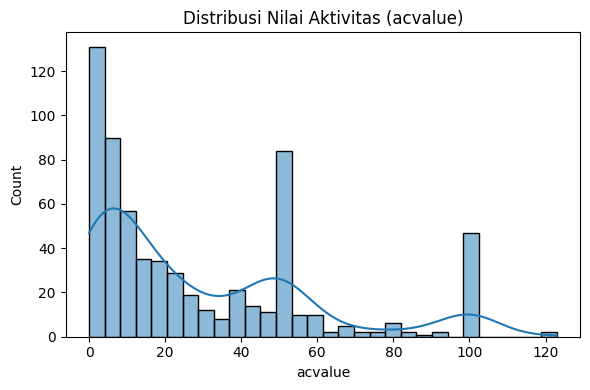

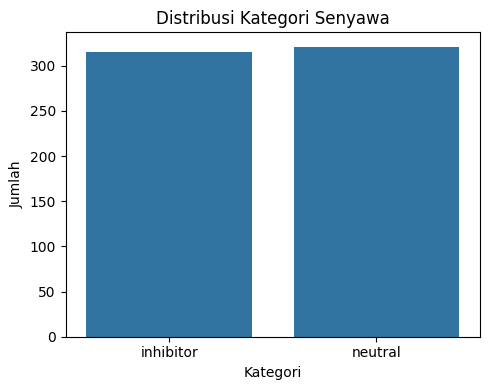

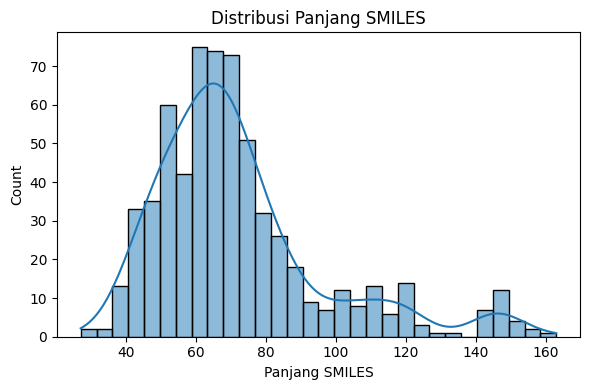

In [ ]:
if "acvalue" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["acvalue"], bins=30, kde=True)
    plt.title("Distribusi Nilai Aktivitas (acvalue)")
    plt.xlabel("acvalue")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

if "categories" in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x="categories", data=df)
    plt.title("Distribusi Kategori Senyawa")
    plt.xlabel("Kategori")
    plt.ylabel("Jumlah")
    plt.tight_layout()
    plt.show()

df["smiles_length"] = df["smiles"].astype(str).apply(len)
plt.figure(figsize=(6,4))
sns.histplot(df["smiles_length"], bins=30, kde=True)
plt.title("Distribusi Panjang SMILES")
plt.xlabel("Panjang SMILES")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [7]:
df

,cid,smiles,acvalue,categories,smiles_length
0,44244736,COC1=C(C(=C(C=C1)C2=C(OC(=N2)C3=CC=CC=C3F)SC4=...,0.0030,inhibitor,66
1,44244911,CC1=NN=C(S1)SC2=C(N=C(O2)C3=CC=CC=C3F)C4=C(C(=...,0.0035,inhibitor,61
2,44245235,COC1=C(C(=C(C=C1)C2=C(OC(=N2)C3=CN=CC=C3)SC4=N...,0.0047,inhibitor,59
3,10451021,CC(=CC1=CC(=C(C=C1)OC)O)C(=O)C2=CC(=C(C(=C2)OC...,0.0090,inhibitor,52
4,44245073,CC1=CN=C(N=C1C)SC2=C(N=C(O2)C3=CC=CC=C3Cl)C4=C...,0.0180,inhibitor,65
...,...,...,...,...,...
631,145958114,COC1=CC=C(C=C1)C(=O)C=CC2=CC=C(C=C2)N3C=C(N=N3...,100.0000,neutral,86
632,145950639,C1=CC=C(C=C1)C2=C(N=NC(=N2)SCC3=CN(N=N3)CC4=CC...,100.0000,neutral,72
633,3168508,C1=CC=C(C=C1)C2=C(N=NC(=N2)SCCC(=O)O)C3=CC=CC=C3,100.0000,neutral,48
634,145952863,CC(C)CC(C(=O)NO)NC(=O)NCC1=CN(N=N1)CC2=CC=CC=C...,119.1000,neutral,60


C:\Users\Dito Adistya\AppData\Local\Temp\ipykernel_31936\3199446681.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


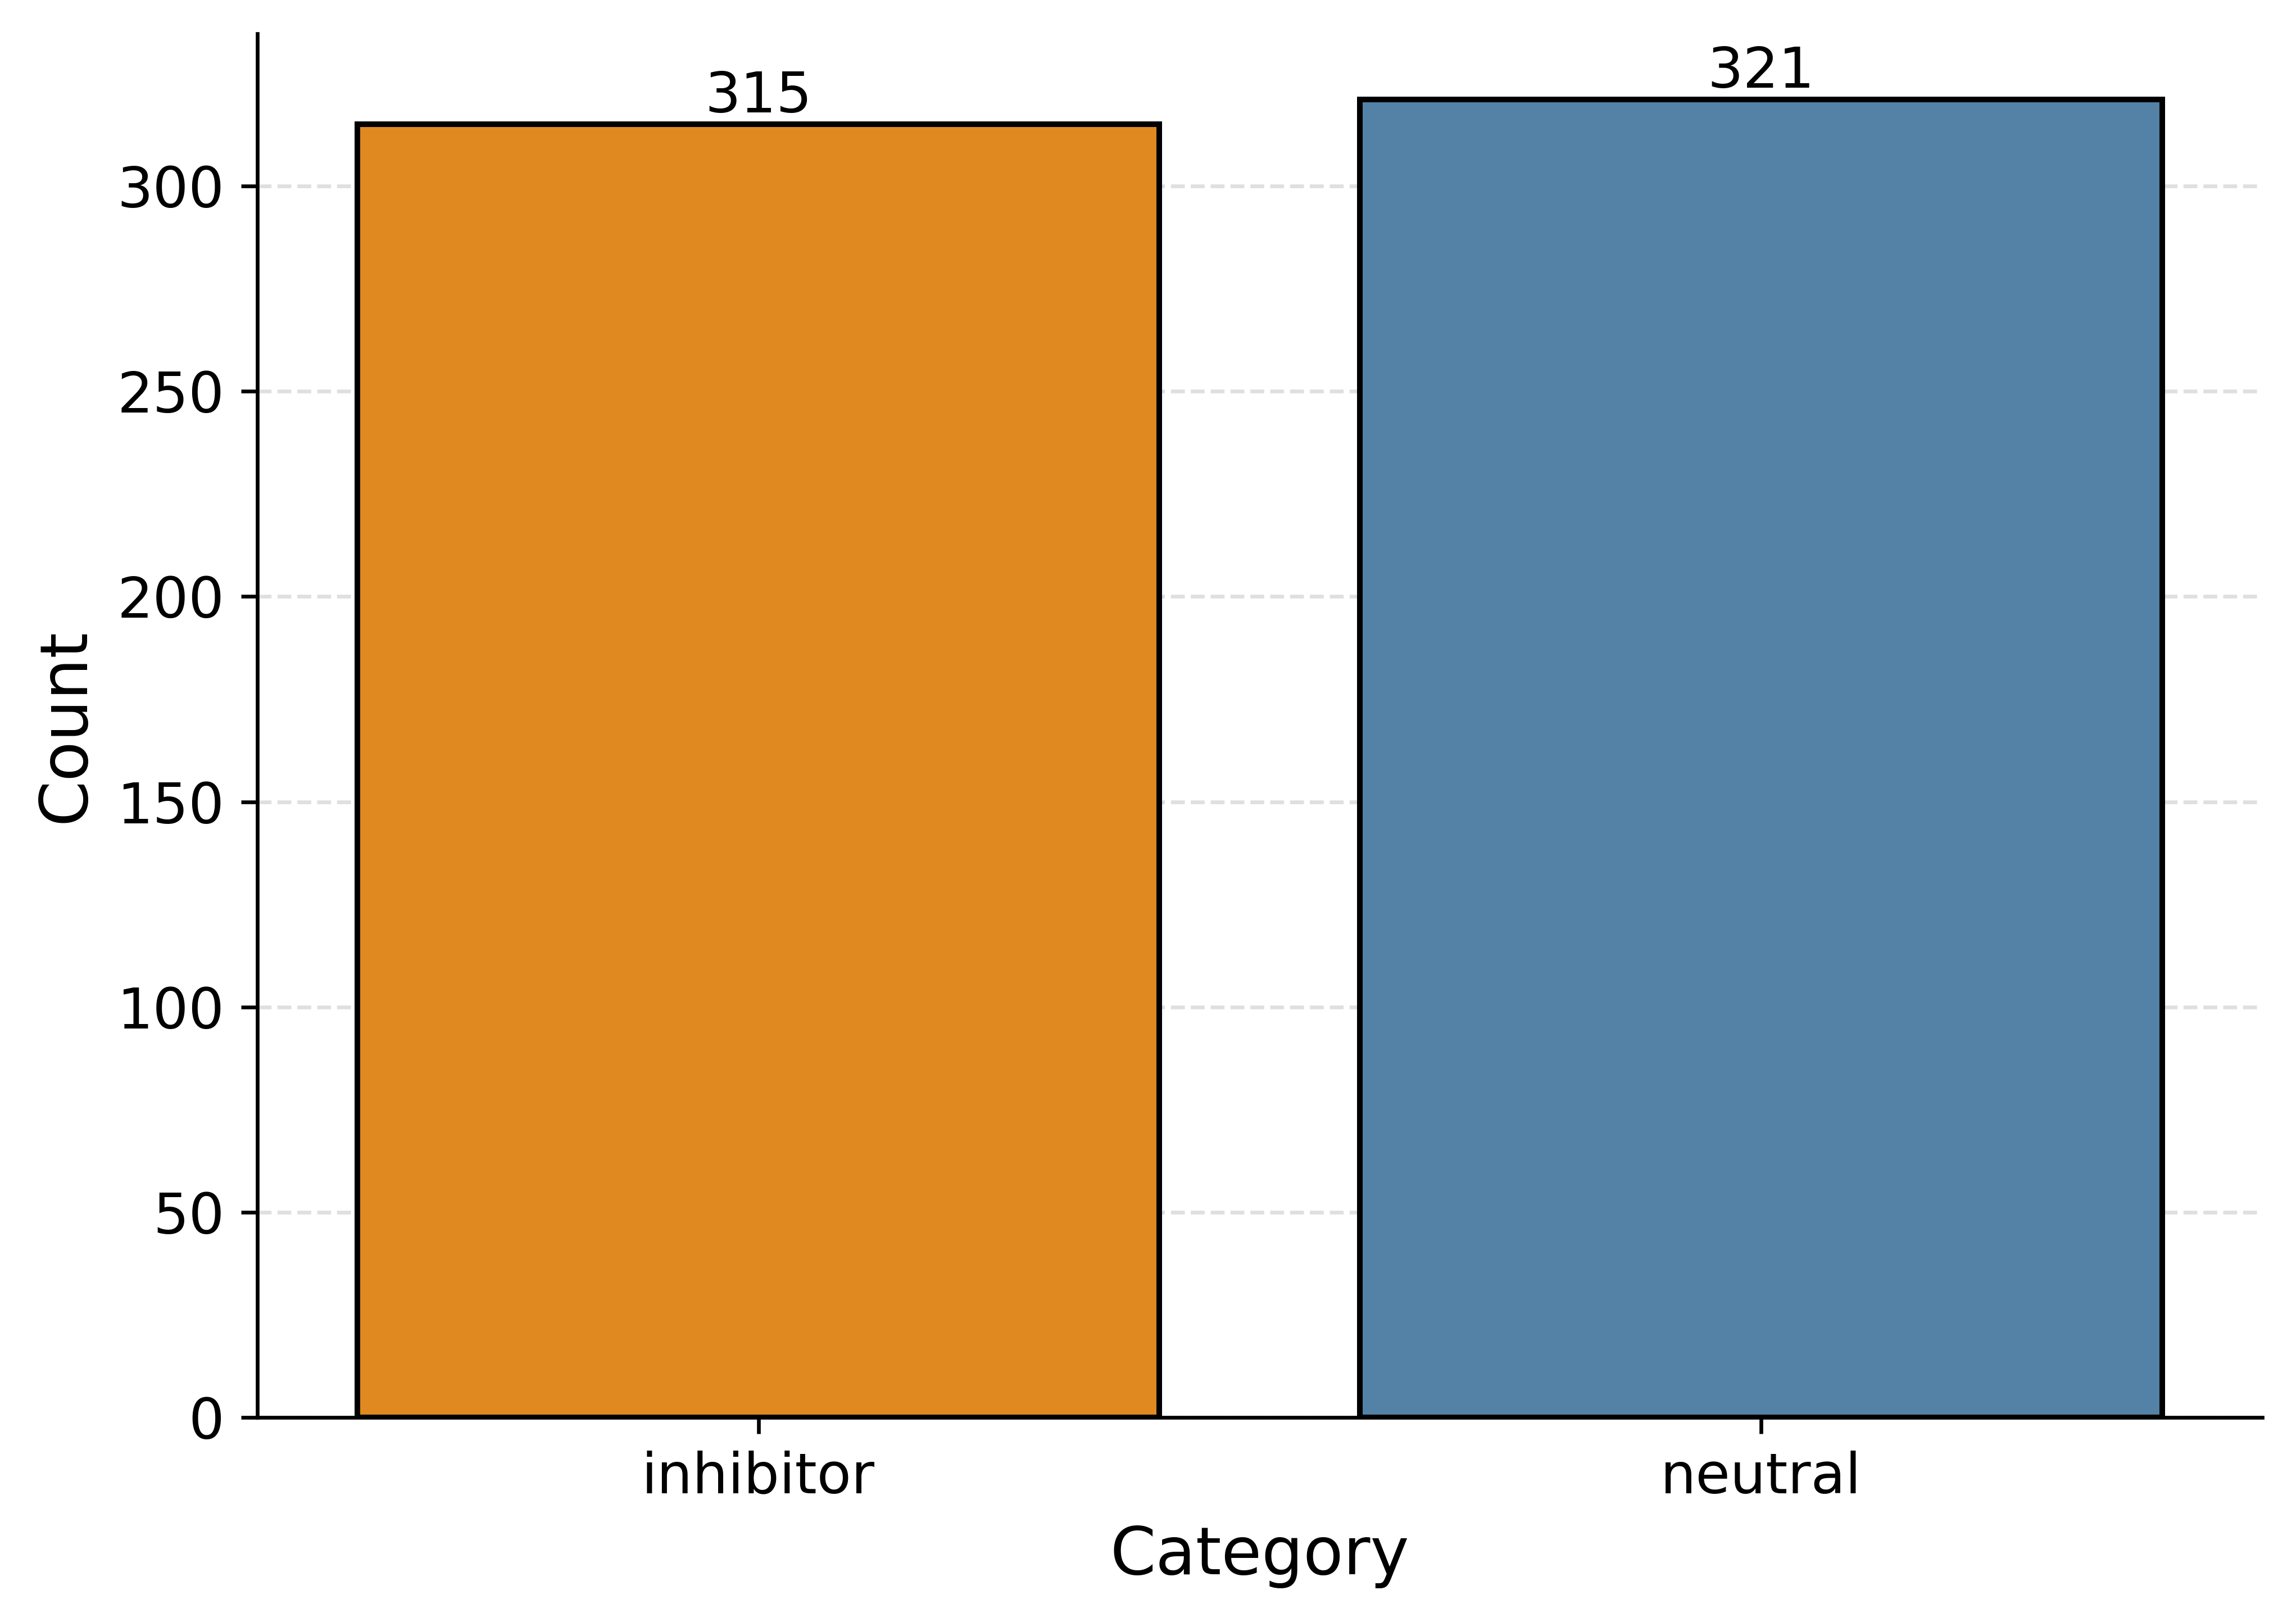

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 13,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (7,5)
})

color_map = {
    'neutral': 'steelblue',   
    'inhibitor': 'darkorange'
}

plt.figure(dpi=600)

ax = sns.countplot(
    data=df,
    x='categories',
    palette=color_map,
    edgecolor='black',
    linewidth=1.2
)

#ax.set_title("Distribution of Target Categories", pad=15)

sns.despine()

ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        str(count),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=12
    )

plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


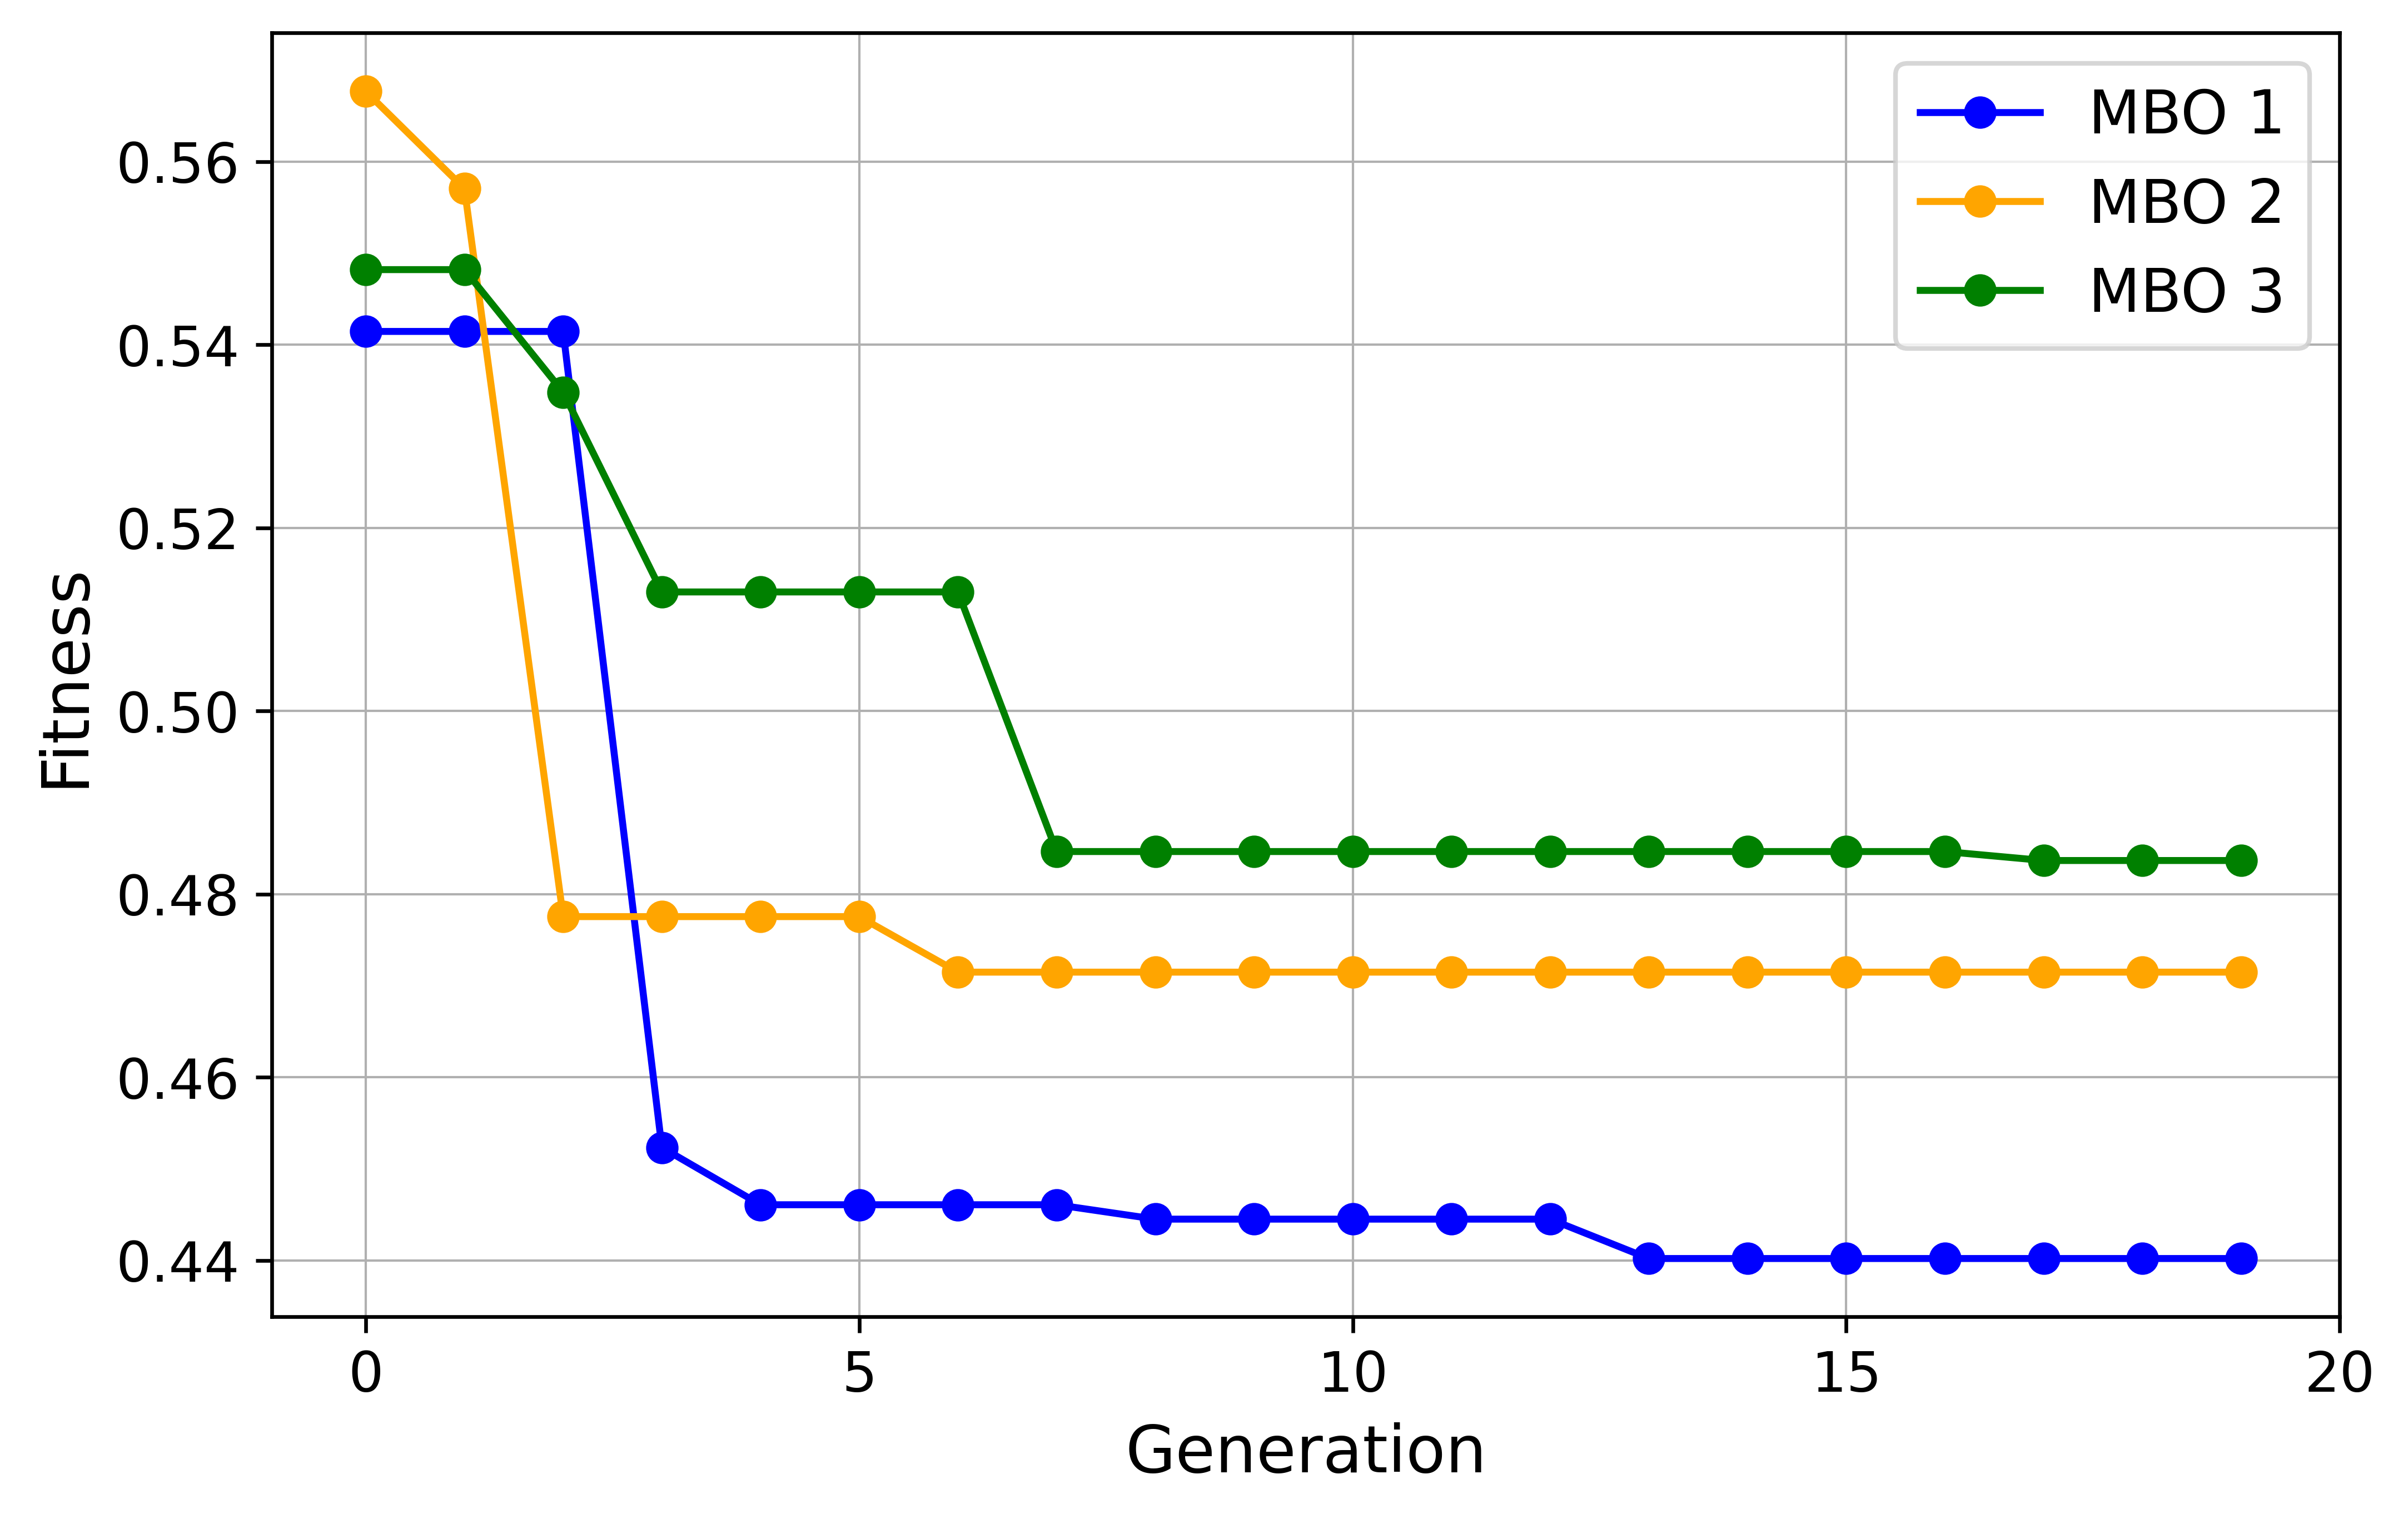

In [7]:
evals = list(range(20))
mbo1 = [0.5414547920227051, 0.5414547920227051, 0.5414547920227051, 0.45232731103897095, 0.44607415795326233,
        0.44607415795326233, 0.44607415795326233, 0.44607415795326233, 0.4445011615753174, 0.4445011615753174,
        0.4445011615753174, 0.4445011615753174, 0.4445011615753174, 0.44020044803619385, 0.44020044803619385,
        0.44020044803619385, 0.44020044803619385, 0.44020044803619385, 0.44020044803619385, 0.44020044803619385]

mbo2 = [0.567677915096283, 0.5570561289787292, 0.4775429368019104, 0.4775429368019104, 0.4775429368019104,
        0.4775429368019104, 0.4714778959751129, 0.4714778959751129, 0.4714778959751129, 0.4714778959751129,
        0.4714778959751129, 0.4714778959751129, 0.4714778959751129, 0.4714778959751129, 0.4714778959751129,
        0.4714778959751129, 0.4714778959751129, 0.4714778959751129, 0.4714778959751129, 0.4714778959751129]

mbo3 = [0.5482057929039001, 0.5482057929039001, 0.5348204374313354, 0.5130017399787903, 0.5130017399787903,
        0.5130017399787903, 0.5130017399787903, 0.48464980721473694, 0.48464980721473694, 0.48464980721473694,
        0.48464980721473694, 0.48464980721473694, 0.48464980721473694, 0.48464980721473694, 0.48464980721473694,
        0.48464980721473694, 0.48464980721473694, 0.4836696684360504, 0.4836696684360504, 0.4836696684360504]

plt.figure(figsize=(8, 5), dpi=600)

plt.plot(evals, mbo1, marker='o', label='MBO 1', color='blue')
plt.plot(evals, mbo2, marker='o', label='MBO 2', color='orange')
plt.plot(evals, mbo3, marker='o', label='MBO 3', color='green')

plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.xticks([0, 5, 10, 15, 20])

plt.grid(True, which='both', linestyle='-', linewidth=0.5)

plt.legend()
plt.show()


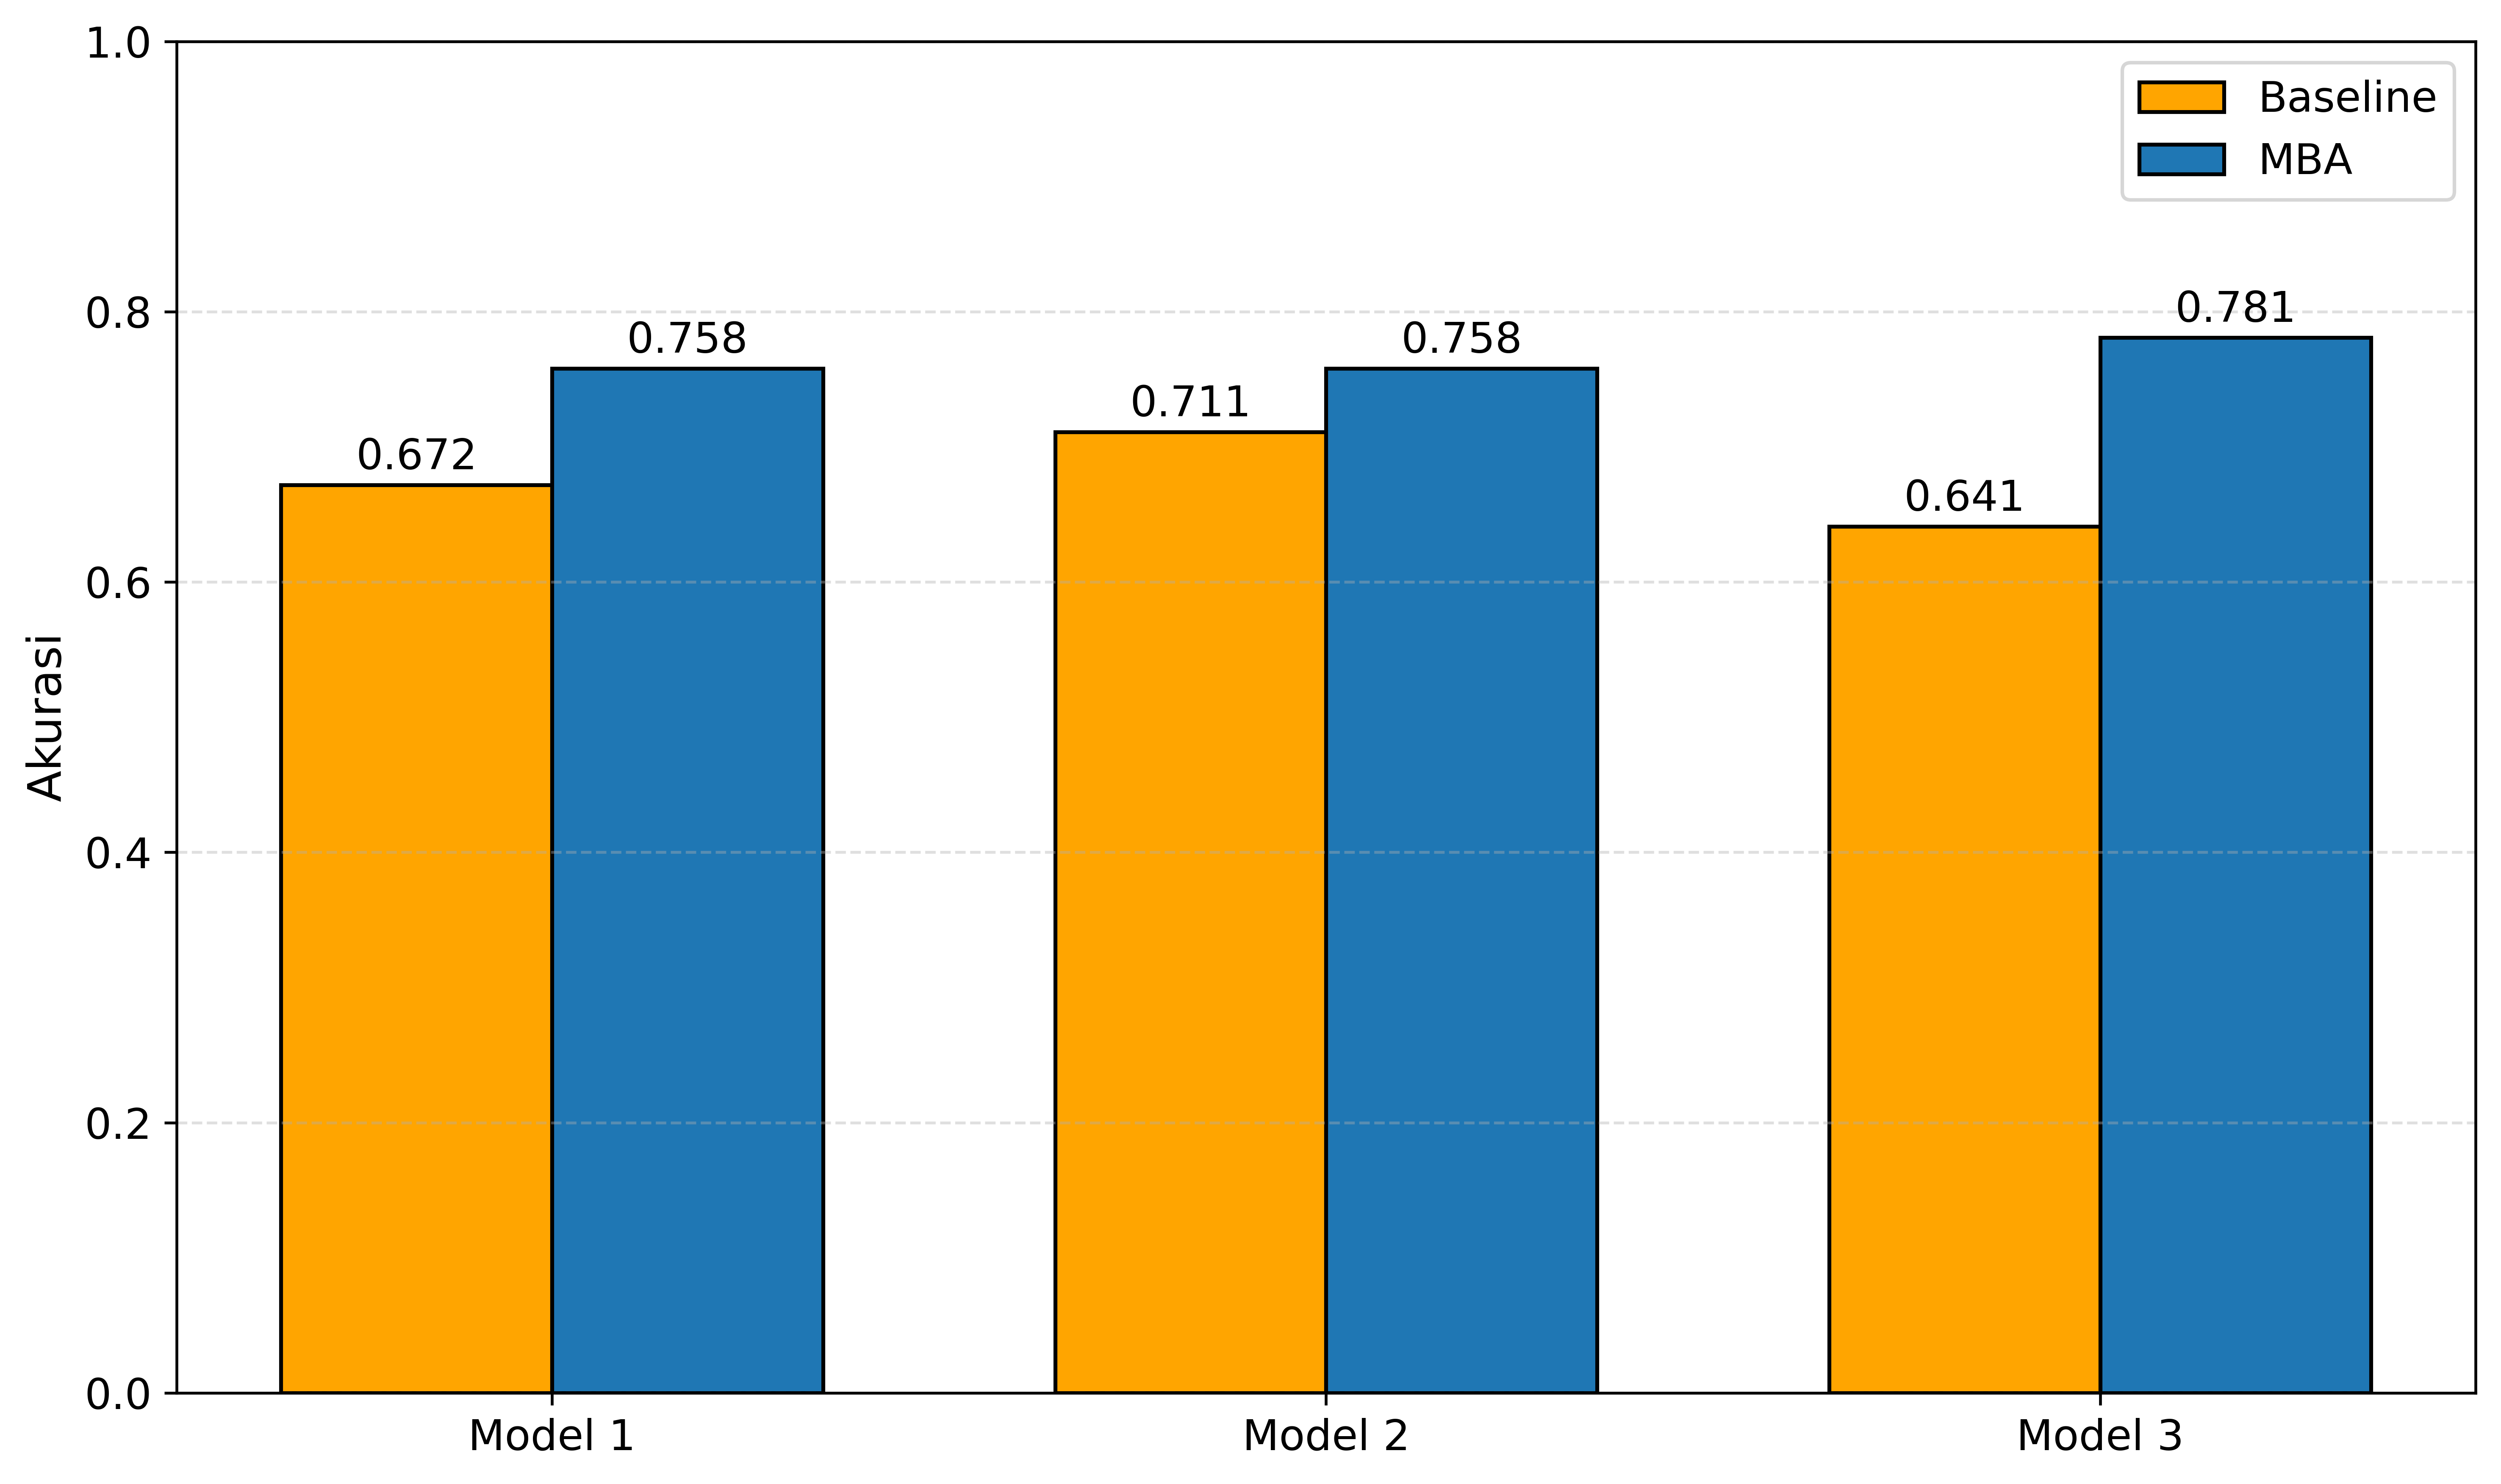

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 13,
    "axes.titlesize": 15,
    "figure.figsize": (10,6)
})

# Data
baseline = np.array([0.672,0.711,0.641])
MBA = np.array([0.758,0.758,0.781])

labels = ["Model 1", "Model 2", "Model 3"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(dpi=600)

# Bars
ax.bar(x - width/2, baseline, width,
       label="Baseline",
       color="#FFA500",
       edgecolor="black",
       linewidth=1.1)

ax.bar(x + width/2, MBA, width,
       label="MBA",
       color="#1f77b4",
       edgecolor="black",
       linewidth=1.1)

# Labels di atas bar
for i in range(len(x)):
    ax.text(x[i] - width/2, baseline[i] + 0.005,
            f"{baseline[i]:.3f}",
            ha="center", va="bottom")
    ax.text(x[i] + width/2, MBA[i] + 0.005,
            f"{MBA[i]:.3f}",
            ha="center", va="bottom")

# Grid
ax.grid(axis="y", linestyle="--", alpha=0.4)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Akurasi")
#ax.set_title("Comparison of Accuracy and F1 Score of Baseline Models on Test Data")

# 👉 Set batas atas Y = 1
ax.set_ylim(0, 1)

ax.legend()

plt.tight_layout()
plt.show()


# Validitas SMILES

In [ ]:
from rdkit import Chem

def check_validity(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

df['valid'] = df['smiles'].apply(check_validity)
print(df['valid'].value_counts())

df = df[df['valid']]


valid
True    636
Name: count, dtype: int64
